In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from io import StringIO

df = Path('../module_7_project_1/airlines_2000_2008_iad_origin.csv')
carriers_df = ('../module_7_project_1/carriers.csv')

df = pd.read_csv(df)

df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,86.0,70.0,-23.0,1346.0,1409,1230,99.0,NaN,0,0.0,...,3,0.0,IAD,0.0,N680BR,4.0,11.0,DH,0.0,2004
1,130.0,69.0,41.0,2033.0,1952,1805,107.0,NaN,0,0.0,...,9,23.0,IAD,0.0,N814CA,2.0,59.0,OH,18.0,2004
2,324.0,299.0,-24.0,1957.0,2021,1736,345.0,NaN,0,NaN,...,10,NaN,IAD,NaN,N583UA,6.0,19.0,UA,NaN,2008
3,72.0,50.0,-11.0,1353.0,1404,1245,79.0,NaN,0,0.0,...,6,0.0,IAD,0.0,N691BR,3.0,19.0,DH,0.0,2004
4,53.0,39.0,-11.0,806.0,817,715,62.0,NaN,0,0.0,...,10,0.0,IAD,0.0,N319UE,5.0,8.0,DH,0.0,2003


In [4]:
carriers_df = pd.read_csv(carriers_df)

carriers_df

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [4]:
# Filter by UniqueCarrier, Year, and Month
filtered_df = df[['UniqueCarrier', 'Year', 'Month']]

# Sort by Year in ascending order
filtered_df_sorted = filtered_df.sort_values(by=['Year', 'Month'])

# Create a new DataFrame with the filtered and sorted data
new_df = filtered_df_sorted.reset_index(drop=True)

# Display the first few rows of the new DataFrame
new_df

,UniqueCarrier,Year,Month
0,NW,2000,1
1,US,2000,1
2,NW,2000,1
3,UA,2000,1
4,UA,2000,1
...,...,...,...
786375,UA,2008,12
786376,UA,2008,12
786377,YV,2008,12
786378,UA,2008,12


In [9]:
# Group by Year and UniqueCarrier, then count the occurrences
carrier_counts = filtered_df.groupby(['Year', 'UniqueCarrier']).size().reset_index(name='Count')

# For each year, find the UniqueCarrier with the maximum count
most_used_carrier_per_year = carrier_counts.loc[carrier_counts.groupby('Year')['Count'].idxmax()]

most_used_carrier_per_year

,Year,UniqueCarrier,Count
6,2000,UA,34976
14,2001,UA,32317
23,2002,UA,23069
29,2003,DH,55173
43,2004,DH,76000
58,2005,DH,66579
83,2006,YV,38469
99,2007,YV,30750
109,2008,UA,25807


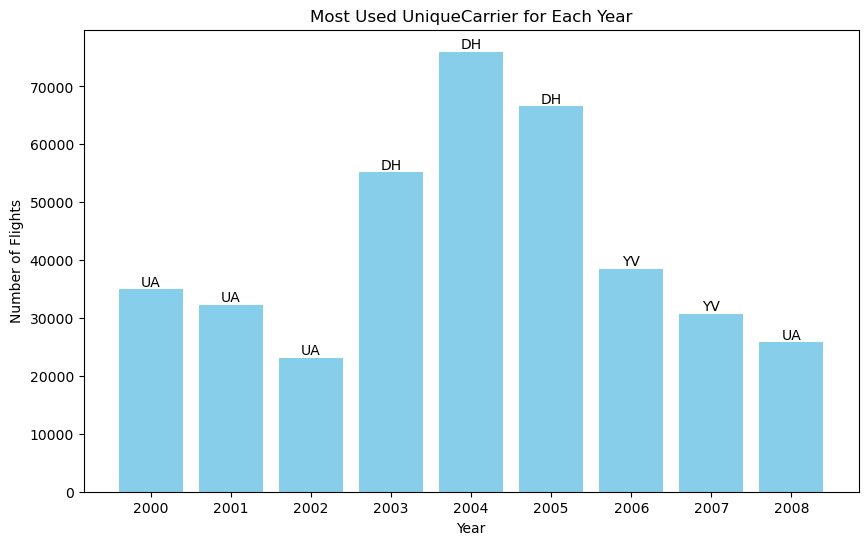

In [10]:

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(most_used_carrier_per_year['Year'], most_used_carrier_per_year['Count'], color='skyblue')
plt.xticks(most_used_carrier_per_year['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Most Used UniqueCarrier for Each Year')

# Add the carrier name on top of each bar
for bar, carrier in zip(bars, most_used_carrier_per_year['UniqueCarrier']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, carrier, ha='center', va='bottom', fontsize=10)

plt.show()

In [11]:
# Group by Year and UniqueCarrier, then count the occurrences
carrier_counts = filtered_df.groupby(['Year', 'UniqueCarrier']).size().reset_index(name='Count')

# For each year, find the UniqueCarrier with the maximum count
most_used_carrier_per_year = carrier_counts.loc[carrier_counts.groupby('Year')['Count'].idxmax()]

# Combine the counts of the most used carriers across all years
top_carrier_combined = most_used_carrier_per_year.groupby('UniqueCarrier')['Count'].sum().reset_index()

top_carrier_combined

,UniqueCarrier,Count
0,DH,197752
1,UA,116169
2,YV,69219


In [7]:
# Most used carrier name based on their code
filtered_df = carriers_df[carriers_df['Code'].isin(['DH', 'YV', 'UA'])]
filtered_df

,Code,Description
434,DH,Independence Air
1297,UA,United Air Lines Inc.
1465,YV,Mesa Airlines Inc.


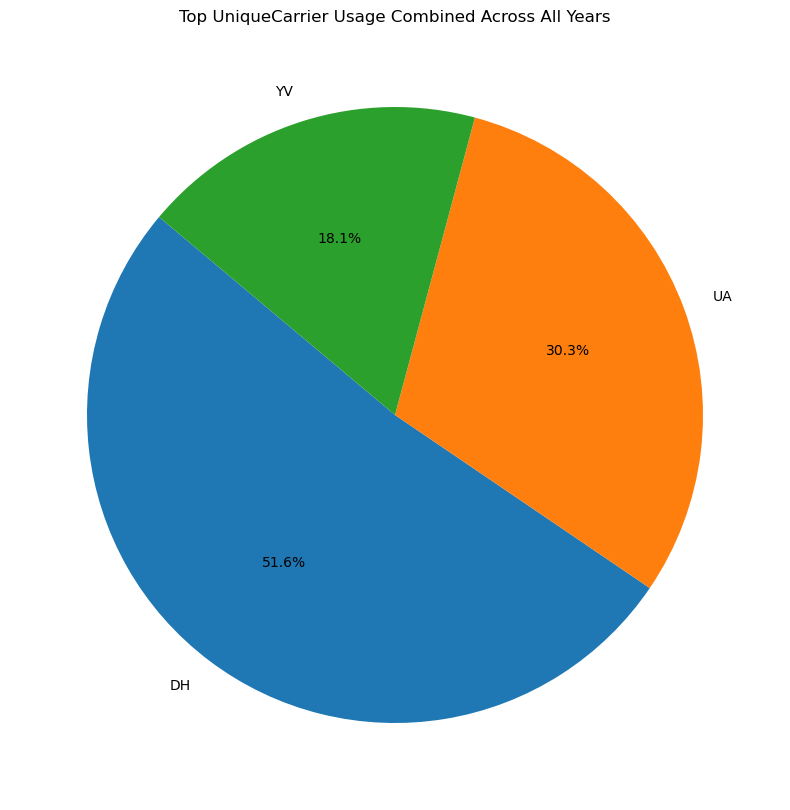

In [12]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_carrier_combined['Count'], labels=top_carrier_combined['UniqueCarrier'], autopct='%1.1f%%', startangle=140)
plt.title('Top UniqueCarrier Usage Combined Across All Years')
plt.show()

In [13]:
# Group by Year and UniqueCarrier, then count the occurrences
carrier_counts = filtered_df.groupby(['Year', 'UniqueCarrier']).size().reset_index(name='Count')

# For each year, find the UniqueCarrier with the minimum count
least_used_carrier_per_year = carrier_counts.loc[carrier_counts.groupby('Year')['Count'].idxmin()]
least_used_carrier_per_year

,Year,UniqueCarrier,Count
3,2000,HP,13
11,2001,MQ,707
20,2002,HP,65
31,2003,EV,1
42,2004,CO,369
57,2005,CO,303
74,2006,EV,101
94,2007,OO,14
103,2008,CO,9


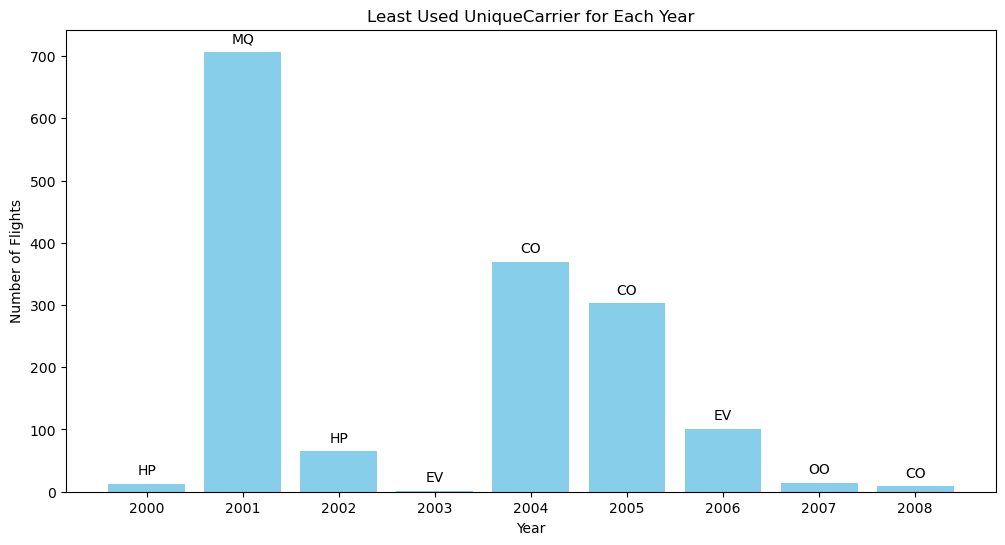

In [15]:
# bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(least_used_carrier_per_year['Year'], least_used_carrier_per_year['Count'], color='skyblue')
plt.xticks(least_used_carrier_per_year['Year'])
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Least Used UniqueCarrier for Each Year')

# Add the carrier name on top of each bar
for bar, carrier in zip(bars, least_used_carrier_per_year['UniqueCarrier']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, carrier, ha='center', va='bottom', fontsize=10)

plt.show()

In [9]:
#least used carries name based on their code
least_carries=carriers_df[carriers_df['Code'].isin(['HP', 'MQ', 'EV', 'CO', 'OO'])]
least_carries

,Code,Description
377,CO,Continental Air Lines Inc.
505,EV,Atlantic Southeast Airlines
642,HP,America West Airlines Inc. (Merged with US Air...
848,MQ,American Eagle Airlines Inc.
949,OO,Skywest Airlines Inc.


In [14]:
# Group by Year and calculate the average number of flights for each year
total_flights_per_year = df.groupby('Year').size().reset_index(name='TotalFlights')

# Display the average number of flights per year
total_flights_per_year

,Year,TotalFlights
0,2000,65462
1,2001,54869
2,2002,44435
3,2003,103386
4,2004,132797
5,2005,122342
6,2006,96010
7,2007,91048
8,2008,76031


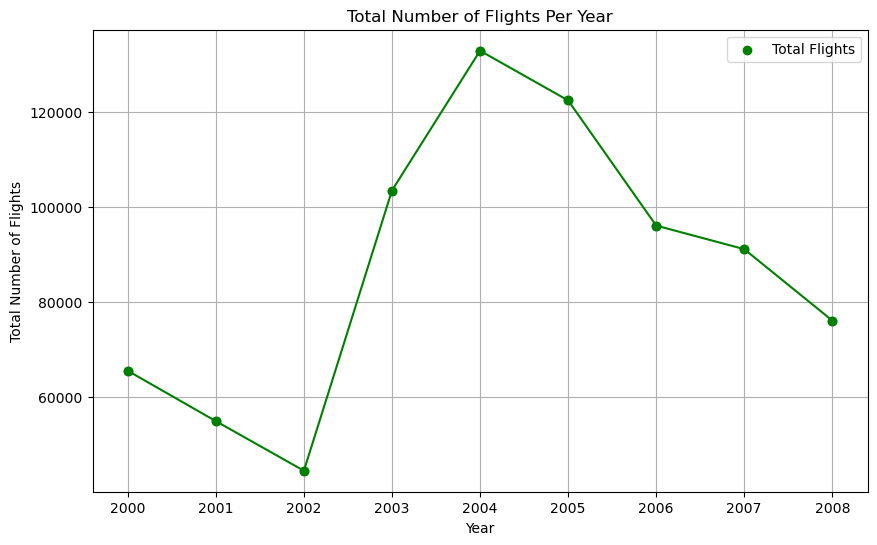

In [16]:
# Plotting the scatter plot with a connecting line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(total_flights_per_year['Year'], total_flights_per_year['TotalFlights'], color='green', label='Total Flights')

# Line connecting the scatter points
plt.plot(total_flights_per_year['Year'], total_flights_per_year['TotalFlights'], color='green', linestyle='-', marker='o')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of Flights')
plt.title('Total Number of Flights Per Year')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()